In [82]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
df1=pd.read_csv("C://Users//mvish//Desktop//Titanic_train.csv")
df2=pd.read_csv("C://Users//mvish//Desktop//Titanic_test.csv")

In [83]:

data = pd.concat([df1, df2], ignore_index=True)


data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [88]:
print(data.info())
print(data.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None
       PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.02006

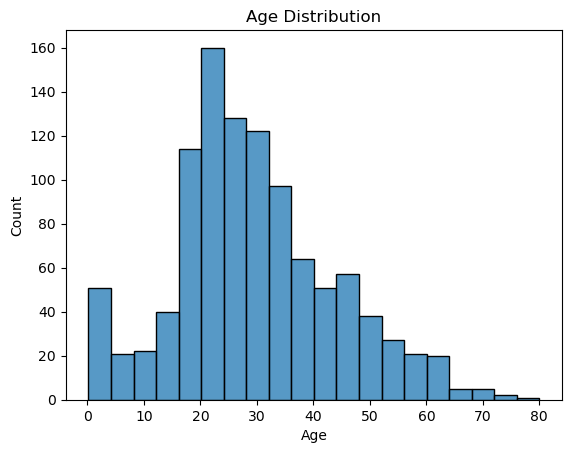

In [85]:
sns.histplot(data=data, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()

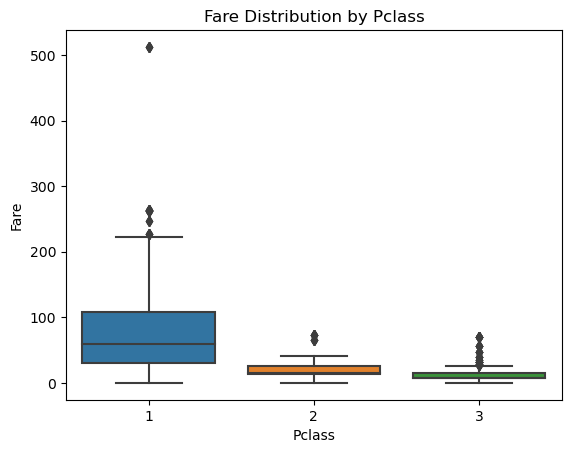

In [86]:
sns.boxplot(data=data, x='Pclass', y='Fare')
plt.title('Fare Distribution by Pclass')
plt.show()

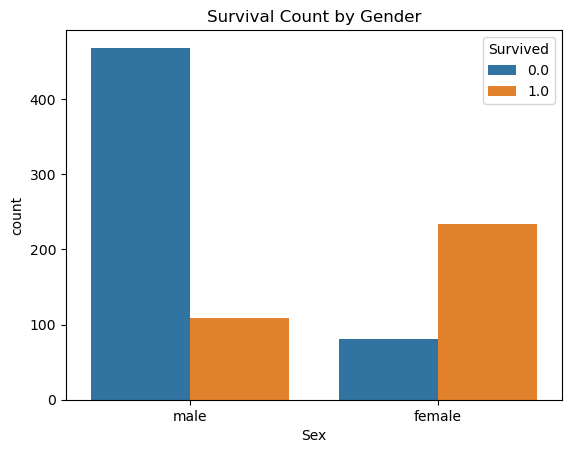

In [87]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

In [67]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data["Survived"].fillna(data["Survived"].median(),inplace=True)
data["Fare"].fillna(data["Fare"].median(),inplace=True)
# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked',"Survived","Fare"], drop_first=True)

In [52]:
data

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Survived_1.0
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,1
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",28.0,0,0,A.5. 3236,8.0500,NaN,1,0,1,0
1305,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,0,0,0
1306,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1,0
1307,1308,3,"Ware, Mr. Frederick",28.0,0,0,359309,8.0500,NaN,1,0,1,0


In [68]:
X = data.drop(['PassengerId', 'Survived_1.0', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived_1.0']


In [69]:
X
X.isnull().sum()

Pclass           0
Age              0
SibSp            0
Parch            0
Sex_male         0
                ..
Fare_227.525     0
Fare_247.5208    0
Fare_262.375     0
Fare_263.0       0
Fare_512.3292    0
Length: 287, dtype: int64

In [70]:
y = data["Survived_1.0"]
y

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Survived_1.0, Length: 1309, dtype: uint8

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\mvish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7595419847328244
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       189
           1       0.61      0.37      0.46        73

    accuracy                           0.76       262
   macro avg       0.70      0.64      0.65       262
weighted avg       0.74      0.76      0.74       262



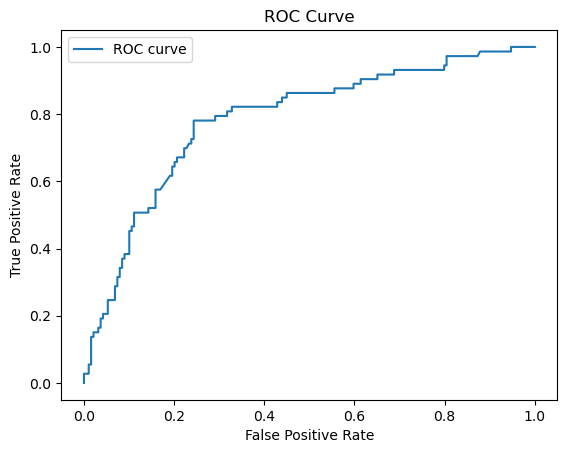

ROC-AUC Score: 0.7842284554613321


In [75]:
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

In [76]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coefficients)

           Feature  Coefficient
0           Pclass    -0.742995
1              Age    -0.030530
2            SibSp    -0.202119
3            Parch    -0.130812
4         Sex_male    -1.962652
..             ...          ...
282   Fare_227.525     0.186139
283  Fare_247.5208    -0.314286
284   Fare_262.375    -0.421817
285     Fare_263.0    -0.155196
286  Fare_512.3292     0.632717

[287 rows x 2 columns]


In [78]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.Collecting streamlit
  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/88/34/0751fd391fe90c8a90e70ef267080e0d461a2bf00c9e84c5a39d3389470d/streamlit-1.34.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/46/30/2118537233fa72c1d91a81f5908a7e843a6601ccc68b76838ebc4951505f/altair-5.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bb/2a/10164ed1f31196a2f7f3799368a821765c62851ead0e630ab52b8e14b4d0/blinker-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for rich<14,>=10.14.0 from https://files.pythonhosted.org/packages/87/67/a37f6214d0e9fe57f6ae54b2956d550ca8365857f42a1ce0392bb21d9410/rich-13.7.1-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://file

In [79]:
import streamlit as st

# Load trained model
# model = load_model('trained_model.pkl')

# Input form
st.title('Titanic Survival Prediction')
sex = st.selectbox('Select Gender', ['male', 'female'])
age = st.slider('Select Age', 0, 100, 30)
pclass = st.selectbox('Select Passenger Class', [1, 2, 3])
fare = st.number_input('Enter Fare', value=50)

2024-05-18 20:33:48.934 
  command:

    streamlit run C:\Users\mvish\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-05-18 20:33:48.942 Session state does not function when running a script without `streamlit run`
